In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
upload=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [28]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [30]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [31]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.drop(columns=['Channel', 'Region'], inplace=True)

In [34]:
df.dtypes

,0
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [35]:
df.skew()

,0
Fresh,2.561323
Milk,4.053755
Grocery,3.587429
Frozen,5.907986
Detergents_Paper,3.631851
Delicassen,11.151586


In [36]:
df=np.log1p(df)+0.001

In [37]:
df.skew()

,0
Fresh,-1.575326
Milk,-0.224063
Grocery,-0.674938
Frozen,-0.352655
Detergents_Paper,-0.235961
Delicassen,-1.091827


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
preprocess_pipelines=Pipeline(steps=[
    ('power',PowerTransformer())
])

In [39]:
columns_for_corr = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_corr = pd.DataFrame(df, columns=columns_for_corr)
df_corr.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.021096,-0.132989,0.386258,-0.158706,0.256442
Milk,-0.021096,1.000000,0.761128,-0.055229,0.678725,0.342310
Grocery,-0.132989,0.761128,1.000000,-0.164525,0.797141,0.239998
Frozen,0.386258,-0.055229,-0.164525,1.000000,-0.212771,0.256318
Detergents_Paper,-0.158706,0.678725,0.797141,-0.212771,1.000000,0.167573
Delicassen,0.256442,0.342310,0.239998,0.256318,0.167573,1.000000


<Axes: >

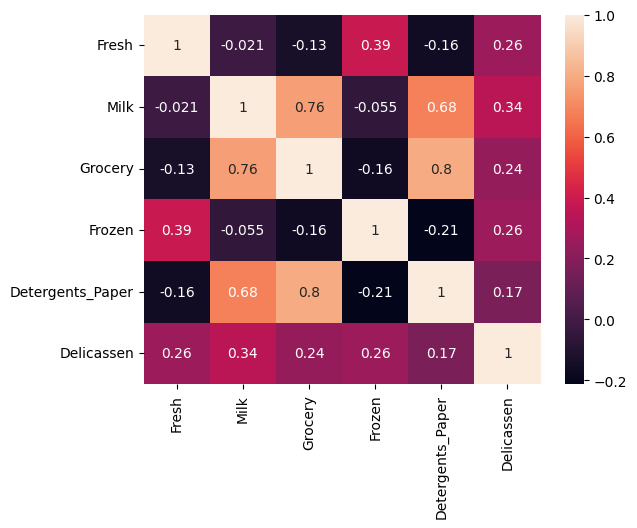

In [40]:
sns.heatmap(df_corr.corr(), annot=True)

In [77]:
X=df

In [79]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
wcss=[]
for k in range(1,11):
  kmeans_pipeline = Pipeline(steps=[
    ("preprocess", preprocess_pipelines),
    ("cluster", KMeans(n_clusters=k,init='k-means++', random_state=42))
])

  kmeans_pipeline.fit_predict(X)
  wcss.append(kmeans_pipeline.named_steps['cluster'].inertia_)
# Moved print statement outside the loop to show the final complete list
print(wcss)

[3520.000000000002, 2344.7006889196127, 1992.7006010522762, 1722.4247842206655, 1531.5910501298504, 1457.0520434549185, 1353.019043218064, 1312.933264443864, 1225.888493940882, 1169.7775901702908]


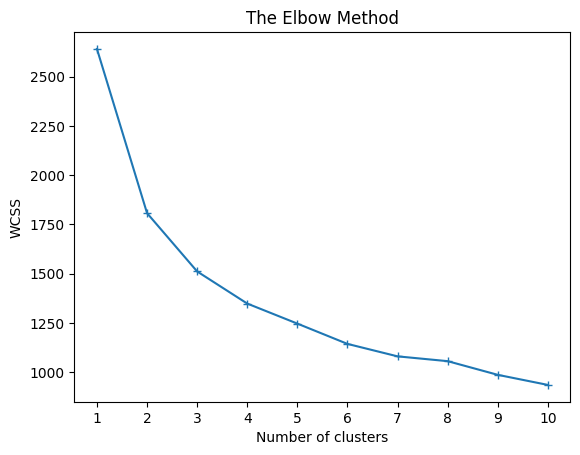

In [43]:
plt.plot(range(1,11),wcss,marker='+')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.447992,9.176438,8.931891,5.371638,7.892705,7.200678
1,8.862917,9.192259,9.167284,7.475772,8.100858,7.483682
2,8.757840,9.084529,8.948026,7.786721,8.166364,8.968632
3,9.493960,7.088574,8.349064,8.765834,6.231481,7.490412
4,10.027413,8.597189,8.882697,8.273826,7.484244,8.554718
...,...,...,...,...,...,...
435,10.300037,9.397986,9.683092,9.484112,5.210486,7.699483
436,10.578172,7.267827,6.640876,8.415274,4.544295,7.761893
437,9.585108,9.648885,10.318053,6.083219,9.606216,7.533624
438,9.240025,7.592862,7.712101,6.947014,5.130899,7.662998


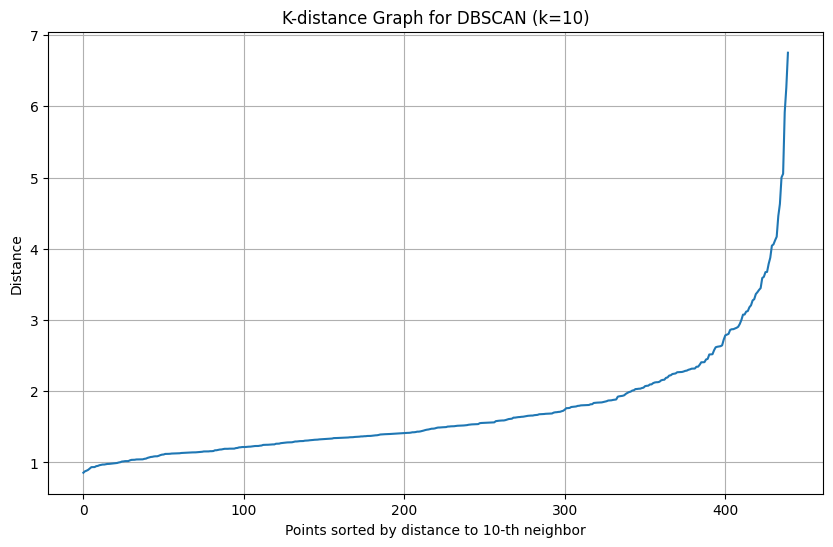

In [48]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, indices = nn.kneighbors(X)
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance to {}-th neighbor'.format(k))
plt.ylabel('Distance')
plt.title('K-distance Graph for DBSCAN (k={})'.format(k))
plt.grid(True)
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
# Re-run DBSCAN with more appropriate parameters based on the k-distance graph or heuristics
dbs = DBSCAN(eps=5, min_samples=8) # TODO: Adjust eps based on the k-distance plot
X['DB_clusters_new'] = dbs.fit_predict(X)
print('Number of clusters found:', X['DB_clusters_new'].nunique())
print('Unique clusters:', X['DB_clusters_new'].unique())

Number of clusters found: 1
Unique clusters: [0]


In [56]:
X_scaled=preprocess_pipelines.fit_transform(X)
gmm=GaussianMixture(n_components=3,
                    covariance_type='full',
                    random_state=42)
labels=gmm.fit_predict(X_scaled)

In [60]:
aic_values = []
bic_values = []
n_components = range(1, 11)

for k in n_components:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))

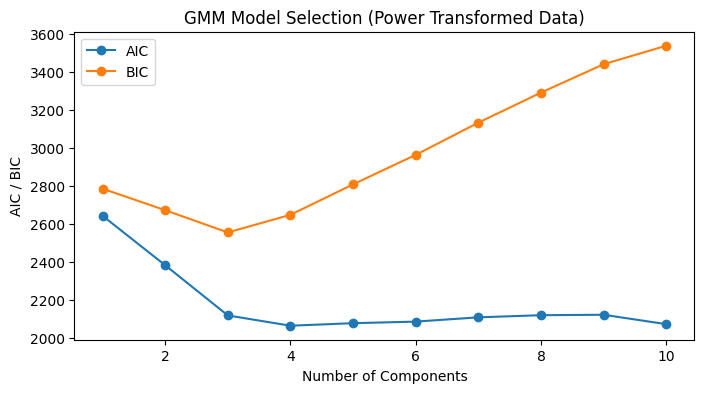

In [61]:
plt.figure(figsize=(8,4))
plt.plot(n_components, aic_values, marker='o', label='AIC')
plt.plot(n_components, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('AIC / BIC')
plt.title('GMM Model Selection (Power Transformed Data)')
plt.legend()
plt.show()

In [63]:
best_k = n_components[np.argmin(bic_values)]
gmm_pipeline = Pipeline([
    ('power', PowerTransformer()),
    ('gmm', GaussianMixture(n_components=best_k, covariance_type='full', random_state=42))
])
gmm_pipeline.fit(X)
gmm_labels = gmm_pipeline.named_steps['gmm'].predict(X)
print("GMM cluster counts:", np.bincount(gmm_labels))

GMM cluster counts: [  0   0 440]


In [66]:
from sklearn.mixture import BayesianGaussianMixture
bgmm_pipeline = Pipeline([
    ('power', PowerTransformer()),
    ('bgmm', BayesianGaussianMixture(
        n_components=10,       # maximum clusters
        covariance_type='full',
        weight_concentration_prior_type='dirichlet_process',
        random_state=42
    ))
])
bgmm_pipeline.fit(X)
bgmm_labels = bgmm_pipeline.named_steps['bgmm'].predict(X)
print("BGMM cluster counts:", np.bincount(bgmm_labels))

BGMM cluster counts: [  0   0   0 110   0   2 320   8]


In [67]:
log_probs=gmm.score_samples(X_scaled)
threshold=np.percentile(log_probs,1)
anomalies=log_probs<threshold

In [68]:
probs=gmm.predict_proba(X)
probs[:5]

array([[2.13222052e-005, 1.63983200e-004, 7.65688626e-007,
        1.10951132e-049, 2.43567755e-017, 2.67706474e-004,
        4.65280100e-008, 3.28481132e-006, 5.06721016e-006,
        9.99537824e-001],
       [5.67834963e-075, 3.02675139e-007, 1.68804069e-004,
        3.50842498e-026, 2.26992038e-009, 9.56520828e-001,
        4.40429782e-004, 1.13808783e-006, 4.13918852e-003,
        3.87293069e-002],
       [1.37858311e-177, 3.50167196e-014, 3.08384197e-004,
        2.09971735e-046, 9.48765047e-011, 9.83547741e-001,
        1.03023551e-003, 3.54822724e-007, 3.36678043e-004,
        1.47766065e-002],
       [1.62444081e-108, 5.04755303e-002, 9.48786264e-001,
        1.12137953e-098, 1.36094221e-006, 2.86477223e-012,
        5.78242225e-004, 1.58602524e-004, 1.73503736e-023,
        7.01161610e-025],
       [2.16297779e-085, 1.97871931e-004, 3.35958317e-001,
        1.74554268e-066, 2.38923407e-010, 6.62997649e-001,
        7.58139630e-004, 4.70051802e-006, 3.91709884e-011,
        8.3

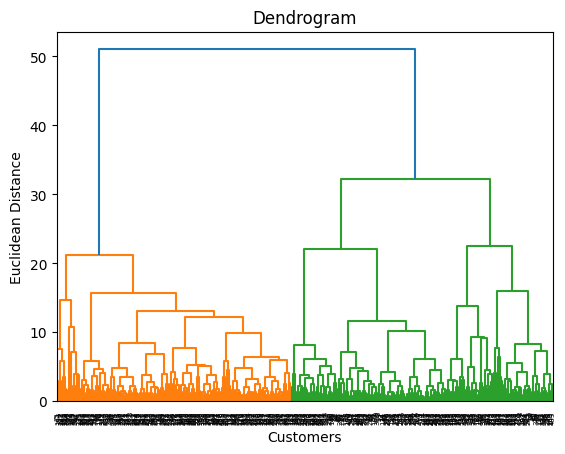

In [69]:
import scipy.cluster.hierarchy as sch
data=sch.linkage(X,method='ward')
dendrogram=sch.dendrogram(data)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [70]:
from scipy.cluster.hierarchy import fcluster

clusters_3 = fcluster(data, t=3, criterion='maxclust')
X['HC_cluster_3'] = clusters_3


In [71]:
X['HC_cluster_3'].value_counts()


,count
HC_cluster_3,
1,208
2,137
3,95


“Hierarchical clustering using Ward linkage suggested a three-cluster structure, producing well-balanced groups (208, 137, 95). This supported the choice of three components in probabilistic clustering models.

In [72]:
import numpy as np

# Count number of points in each cluster
counts = np.bincount(bgmm_labels)
print("BGMM cluster counts:", counts)

# Count non-empty clusters
effective_clusters = np.sum(counts > 0)
print("Number of effective clusters:", effective_clusters)


BGMM cluster counts: [  0   0   0 110   0   2 320   8]
Number of effective clusters: 4


In [73]:
# Consider clusters with very few points (<5) as anomalies
tiny_clusters = [i for i, c in enumerate([110, 2, 320, 8]) if c < 5]

X['BGMM_cluster_final'] = bgmm_labels
X.loc[X['BGMM_cluster_final'].isin(tiny_clusters), 'BGMM_cluster_final'] = -1


Final end-to-end project script for your Wholesale Customers clustering using preprocessing pipeline + BGMM + anomalies

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

In [102]:
from google.colab import files
upload=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (2).csv


In [103]:
df = pd.read_csv('Wholesale customers data.csv')

In [104]:
X=df.copy()

In [105]:
preprocessing_pipeline=Pipeline(steps=[
    ('power',PowerTransformer())])

In [106]:
X_preprocessed=preprocessing_pipeline.fit_transform(X)

In [113]:
bgmm=BayesianGaussianMixture(n_components=10,
                             covariance_type='full',
    random_state=42)
bgmm.fit(X_preprocessed)
bgmm_labels=bgmm.predict(X_preprocessed)

In [114]:
X = pd.DataFrame(X)  # make sure it's a DataFrame to store labels
X['BGMM_cluster'] = bgmm_labels

In [119]:
counts = np.bincount(bgmm_labels)
# Treat clusters with <50 points as anomalies
tiny_clusters = [i for i, c in enumerate(counts) if c < 50]

X['BGMM_cluster_final'] = bgmm_labels
X.loc[X['BGMM_cluster_final'].isin(tiny_clusters), 'BGMM_cluster_final'] = -1  # anomalies

# Check remaining main clusters
print("Final clusters including anomalies:")
print(X['BGMM_cluster_final'].value_counts())

Final clusters including anomalies:
BGMM_cluster_final
 5    205
 3     97
 1     86
-1     52
Name: count, dtype: int64


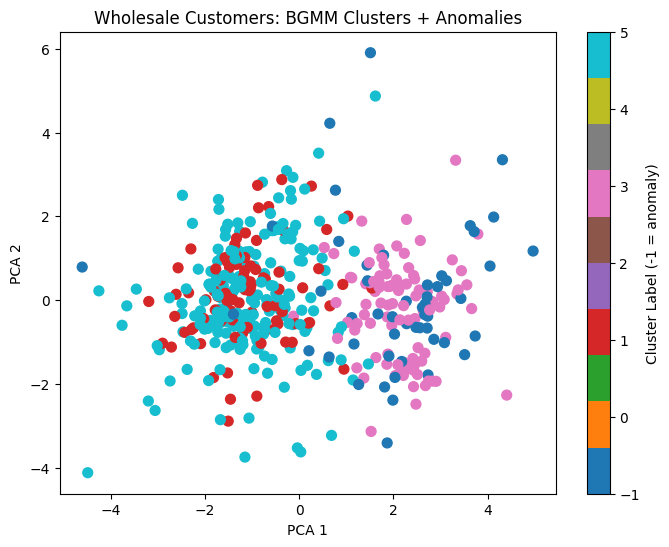

In [122]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=X['BGMM_cluster_final'],
    cmap='tab10',
    s=50
)
plt.title('Wholesale Customers: BGMM Clusters + Anomalies')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster Label (-1 = anomaly)')
plt.show()

In [123]:
cluster_means = X.groupby('BGMM_cluster_final').mean()
print("\nMean feature values per cluster:")
print(cluster_means)


Mean feature values per cluster:
                     Channel    Region         Fresh          Milk  \
BGMM_cluster_final                                                   
-1                  1.865385  1.923077  10641.384615  13378.000000   
 1                  1.000000  1.313953  12264.313953   3210.197674   
 3                  2.000000  3.000000   9127.092784   9372.484536   
 5                  1.000000  3.000000  13593.756098   3265.819512   

                         Grocery       Frozen  Detergents_Paper   Delicassen  \
BGMM_cluster_final                                                             
-1                  20330.826923  3970.826923       8649.653846  2762.153846   
 1                   4034.767442  3308.186047        794.476744  1116.139535   
 3                  13800.474227  1493.350515       6099.628866  1801.041237   
 5                   3686.453659  3491.746341        771.151220  1251.814634   

                    BGMM_cluster  
BGMM_cluster_final           